<a href="https://colab.research.google.com/github/ErickJPM/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nombre: Erick de Jesús Pérez Macías
#Matricula: 1718110404
#Grupo: IDGS91

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns=9


#Importar Dataset

In [2]:
df=pd.read_csv("titanic.csv")
df


,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


#Analizamos el dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [4]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


#Crear una columna(Feature Enginering)

In [6]:
df['Male']=df['Sex']=="male"

In [7]:
df['Male'].sum()

573

#Scatter plot

Text(0, 0.5, 'Age')

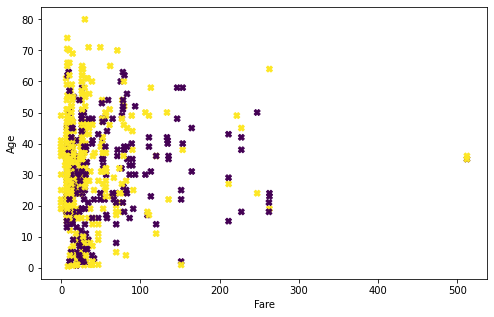

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'],df['Age'],c=df['Male'],marker="X")
plt.xlabel("Fare")
plt.ylabel("Age")

#Separar caracteristicas y objetivo

In [9]:
x=df[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']].values
y=df['Survived'].values


In [10]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

#Configurar modelo

In [11]:
model=LogisticRegression()

#Dividir en train y test

In [12]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=124)

#Entrenar

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

#Predicciones

In [14]:
y_pred= model.predict(X_test)

#Analizar las predicciones

In [15]:
X_test.shape

(178, 6)

In [16]:
X_test[:]

array([[3, 4.0, 4, 1, 29.125, True],
       [3, 21.0, 0, 0, 7.925, True],
       [1, 45.0, 0, 0, 26.55, True],
       ...,
       [2, 28.0, 0, 0, 13.5, True],
       [3, 16.0, 0, 0, 7.7333, False],
       [2, 50.0, 0, 0, 10.5, False]], dtype=object)

In [17]:
y_test[:]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1])

In [18]:
 y_pred[:]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1])

In [19]:
y_pred[6]

1

In [20]:
y_test[6]

0

#Probabilidad

In [21]:
model.predict_proba(X_test)[6,0]

0.43512149983433746

In [22]:
model.predict_proba(X_test)[6,1]

0.5648785001656625

In [23]:
y.shape


(887,)

In [24]:
y.sum()#Personas que SI sobrevivieron


342

In [25]:
y.shape - y.sum() #Personas que NO sobrevivieron

array([545])

#Metricas

Accuracy= numero de predicciones correctas/total de predicciones

In [26]:
y_pred==y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [27]:
(y_pred==y_test).sum()

141

In [28]:
y_test.shape

(178,)

In [29]:
accuracy= (y_pred==y_test).sum()/y_test.shape
accuracy

array([0.79213483])

#Matriz de confusión

In [30]:
confusion_matrix(y_test,y_pred)

array([[100,  19],
       [ 18,  41]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


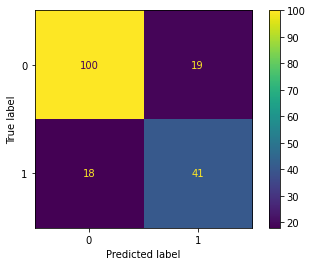

In [31]:
plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


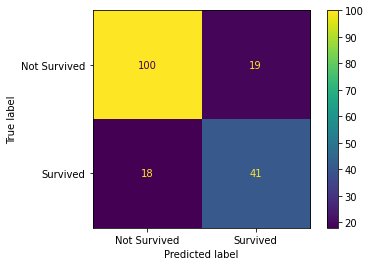

In [32]:
labels=["Not Survived","Survived"]
plot_confusion_matrix(model,X_test,y_test,display_labels=labels)

In [33]:
labels=["No sobrevivió","Sobrevivió"]
print(classification_report(y_test,y_pred,target_names=labels))

               precision    recall  f1-score   support

No sobrevivió       0.85      0.84      0.84       119
   Sobrevivió       0.68      0.69      0.69        59

     accuracy                           0.79       178
    macro avg       0.77      0.77      0.77       178
 weighted avg       0.79      0.79      0.79       178



#Accuracy de la confusion Matrix

accuracy= suma de predicciones correctas / total de predicciones



In [34]:
accuracy=   (100+41)/(100+41+18+19)
accuracy

0.7921348314606742

# Precisión 
¿Qué proporcion de identificaciones positivas fue realmente correcta?

precision= positivos predichos correctamente/ predicciones positvas

In [35]:
precision= (41)/(41+19)
precision

0.6833333333333333

# Recall

¿Que proporción de positivos reales se identificó correctamente?

recall= True positive /(True positive+ False negative)

In [36]:
recall=(41)/(41+18)
recall

0.6949152542372882

# F1 Score

es el promedio de precision y recall

f1_score= 2 *((precision * recall)/(precision + recall))

In [37]:
f1= 2 *((precision * recall)/(precision + recall))
f1

0.6890756302521008

# SKLearn Metrics

In [38]:
print("Accuracy:{}:{}".format(accuracy,accuracy_score(y_test,y_pred)))

Accuracy:0.7921348314606742:0.7921348314606742


In [39]:
print("Precisión:{}:{}".format(precision,precision_score(y_test,y_pred)))

Precisión:0.6833333333333333:0.6833333333333333


In [40]:
print("Recall:{}:{}".format(recall,recall_score(y_test,y_pred)))

Recall:0.6949152542372882:0.6949152542372882


In [41]:
print( "F1 Score:{}:{}".format(f1,f1_score))

F1 Score:0.6890756302521008:<function f1_score at 0x7fa95b7450e0>


In [44]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       119
           1       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



#Cambiar el umbral(Threshold)

In [47]:
y_pred=model.predict_proba(X_test)[:,1]>0.75

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       119
           1       0.90      0.46      0.61        59

    accuracy                           0.80       178
   macro avg       0.84      0.72      0.74       178
weighted avg       0.82      0.80      0.78       178



#Conclusión

###Cuando se trata del analisis de datos, nos estamos enfrentando a un tema muy delicado, debido a que no simplemente es revisar los datos cambiar algunos valores y listo,si no que tenemos que ser muy cuidadosos en el tipo de datos que trabajemos, comprobar si hay datos nulos y hacer transformaciones de datos, y en dicho proceso si cometemos algún error podriamos tener consecuencias graves con la empresa que nos contrate.

###Otro punto muy escencial cuando hablamos de datos es la creacion de modelos predictivos, los cuales van a tener metricas muy escenciales, como por ejemplo la precision, el recall, el accuracy, etc., si nuestro modelo no tiene metricas aceptables, muchas veces no nos sería de mucha utilidad y algunas veces podria predecir datos completamente incorrectos.